# Machine Learning - 3rd Practice Project 

### Glass Identification Project 

-- Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [70]:
glass = pd.read_csv("C:/Users/user/Downloads/Glass Identification.csv",header = None)
glass

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [71]:
new_header = ['ID number','Refractive Index (RI)','Sodium (Na)','Magnesium (Mg)','Aluminium (Al)','Silicon (Si)','Potassium (K)','Calcium (Ca)','Barium (Ba)','Iron (Fe)','Type Of Glass']

In [72]:
glass.columns = new_header

In [73]:
glass

,ID number,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
glass.shape

(214, 11)

In [24]:
glass.head(10)

,ID number,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [25]:
glass.tail(10)

,ID number,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [26]:
#Checking for null values
glass.isnull().sum()

ID number                0
Refractive Index (RI)    0
Sodium (Na)              0
Magnesium (Mg)           0
Aluminium (Al)           0
Silicon (Si)             0
Potassium (K)            0
Calcium (Ca)             0
Barium (Ba)              0
Iron (Fe)                0
Type Of Glass            0
dtype: int64

<Axes: >

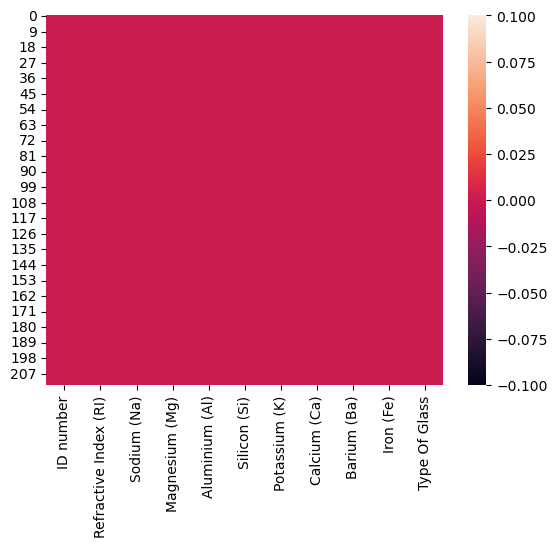

In [27]:
#Visually checking for null values
sns.heatmap(glass.isnull())

-- No Missing values in the dataset given..

In [28]:
#Checking for Duplicates
glass.duplicated().sum()

0

-- No duplicate values also in the given dataset..

In [29]:
#Checking for dataset info
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID number              214 non-null    int64  
 1   Refractive Index (RI)  214 non-null    float64
 2   Sodium (Na)            214 non-null    float64
 3   Magnesium (Mg)         214 non-null    float64
 4   Aluminium (Al)         214 non-null    float64
 5   Silicon (Si)           214 non-null    float64
 6   Potassium (K)          214 non-null    float64
 7   Calcium (Ca)           214 non-null    float64
 8   Barium (Ba)            214 non-null    float64
 9   Iron (Fe)              214 non-null    float64
 10  Type Of Glass          214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [30]:
#Checking the number of unique values of each column
glass.nunique()

ID number                214
Refractive Index (RI)    178
Sodium (Na)              142
Magnesium (Mg)            94
Aluminium (Al)           118
Silicon (Si)             133
Potassium (K)             65
Calcium (Ca)             143
Barium (Ba)               34
Iron (Fe)                 32
Type Of Glass              6
dtype: int64

## Univariate Analysis 

In [31]:
glass.describe()

,ID number,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


-- As we can see from the above data, we have various statistical elements present such as mean,std deviation, first quartile(25%),second quartile(50%) and third quartile(75%).

-- As we know that, if mean > median = right skewed; mean < median = left skewed. And from the above data, we can see most of our features are right or positively skewed except for 'density' column which is slightly skewed to the left.

-- If the difference between the third quartile and the max value is huge,there might be presence of outliers. From the above description we see that there is not much huge difference in any of the features...and there might not be much outliers present in the data.

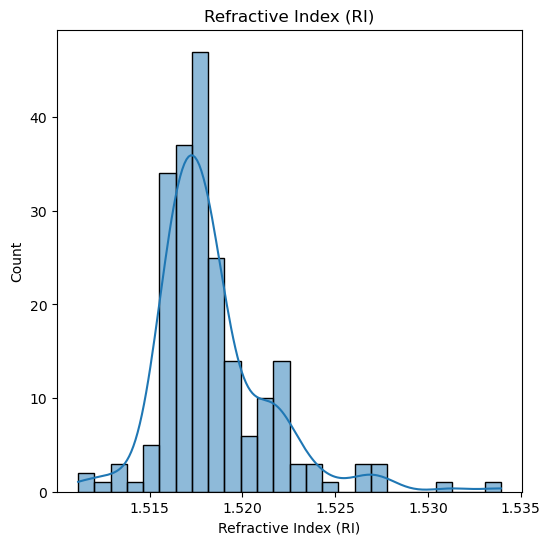

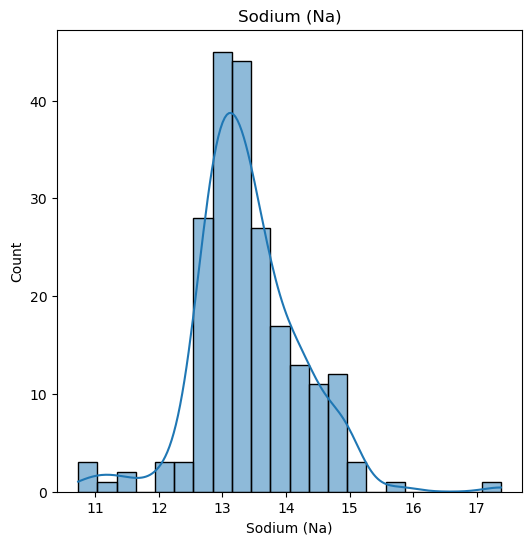

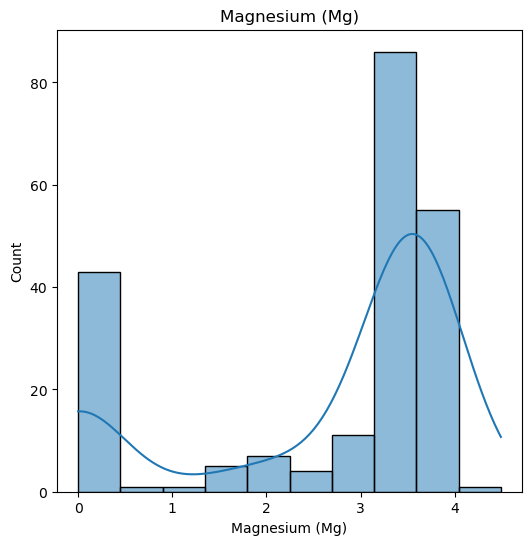

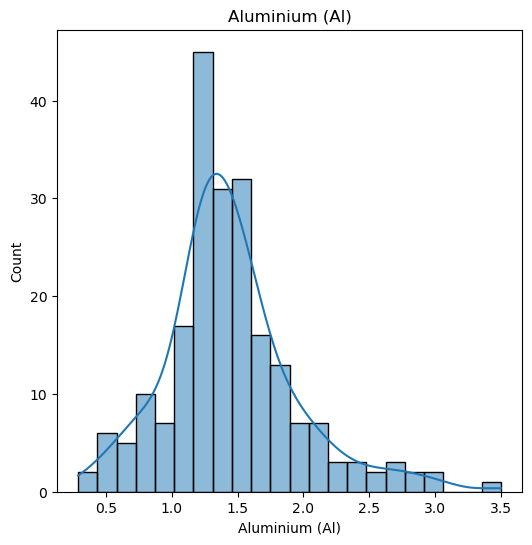

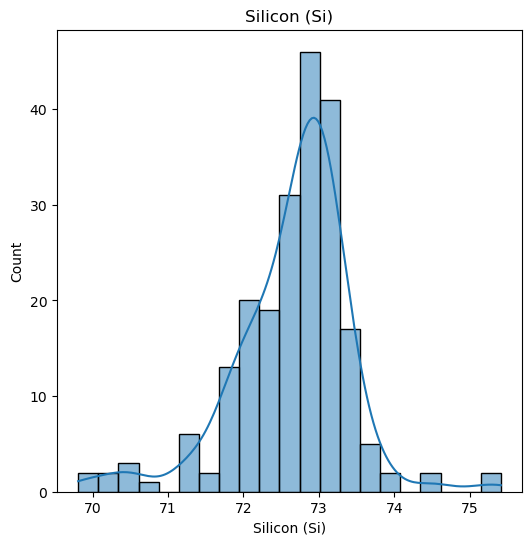

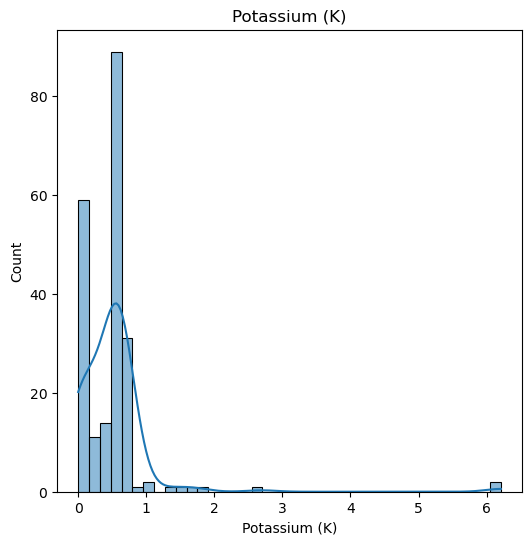

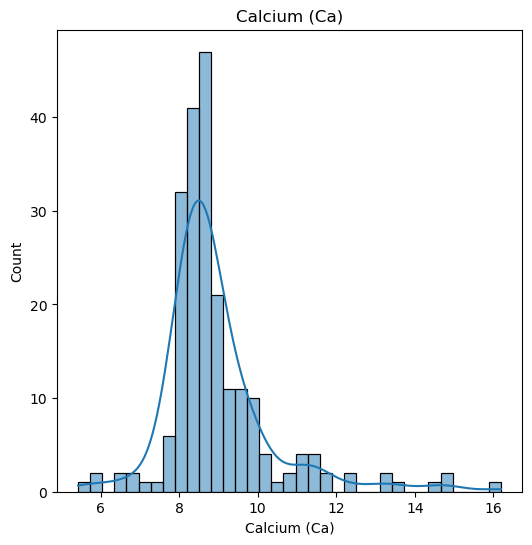

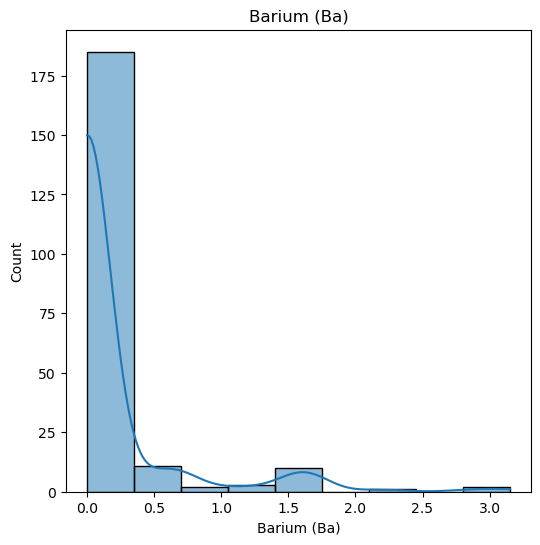

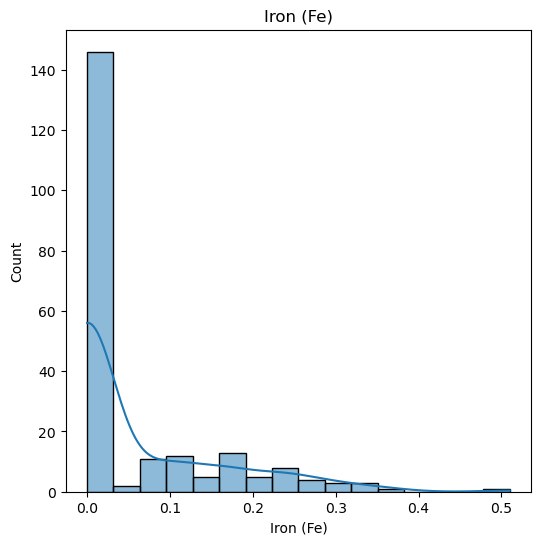

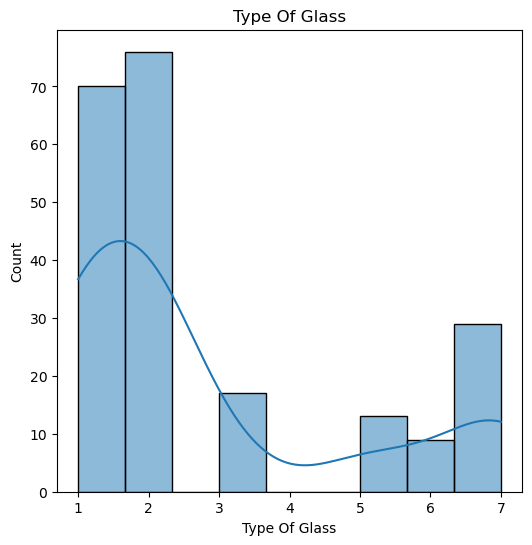

In [42]:
#Distribution of skewness
for column in glass.columns:
    plt.figure(column, figsize = (6,6))
    sns.histplot(x = column,data = glass,kde=True)
    plt.title(column)
    plt.show()

-- Except ID number and Type of glass(dependent feature), most of the features are either left or right skewed...

   The features 'Refractive Index (RI)' , 'Sodium (Na)' , 'Silicon (Si)' are almost normally distributed...
   
   Left-Skewed features - 'Magnesium (Mg)', 'Potassium (K)'
   
   Right-Skewed features - 'Aluminium (Al)', 'Barium (Ba)', 'Iron (Fe)', 'Calcium (Ca)'

In [74]:
#Dropping the Id number column as it does not affect the prediction process
glass.drop('ID number', axis=1, inplace = True)

In [75]:
glass

,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Bivariate Analysis 

-- Now we shall see how the variables(features) are related to each other and what can we derive from them. Also we shall check how the independent variables are correlated to the dependent feature.

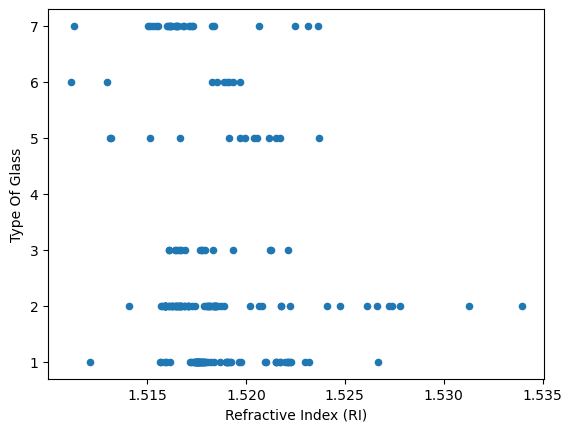

In [46]:
glass.plot.scatter(x='Refractive Index (RI)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a higher refractive Index than the classes of glass (4 and above)

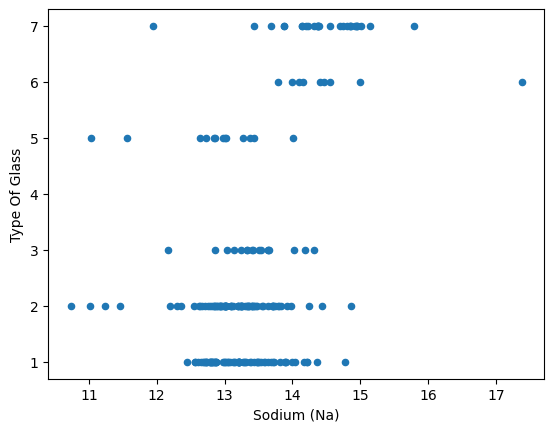

In [47]:
glass.plot.scatter(x='Sodium (Na)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have an average Sodium content of 13-14 than the other classes of glass (4 and above) have a Sodium content higher than that of the other class...

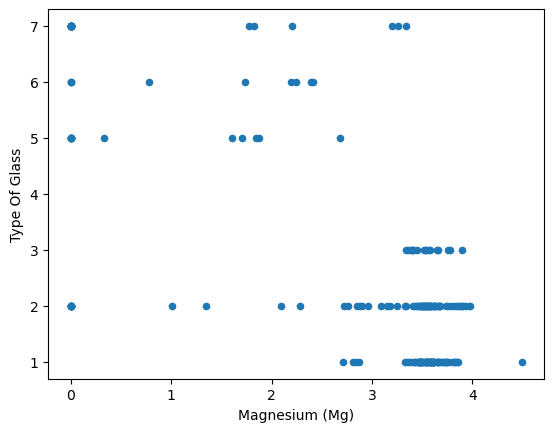

In [48]:
glass.plot.scatter(x='Magnesium (Mg)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a higher Magnesium content than the other classes of glass (4 and above)

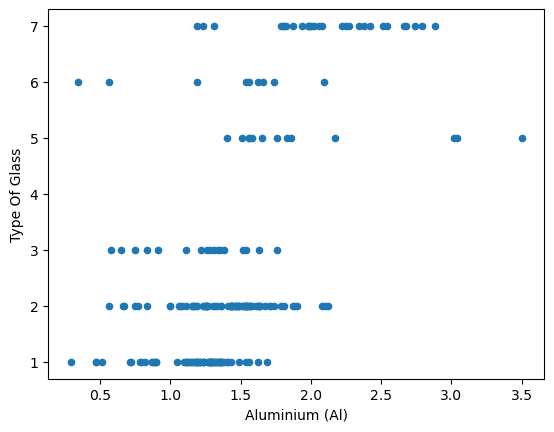

In [49]:
glass.plot.scatter(x='Aluminium (Al)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a lower Aluminium content than the other classes of glass (4 and above)

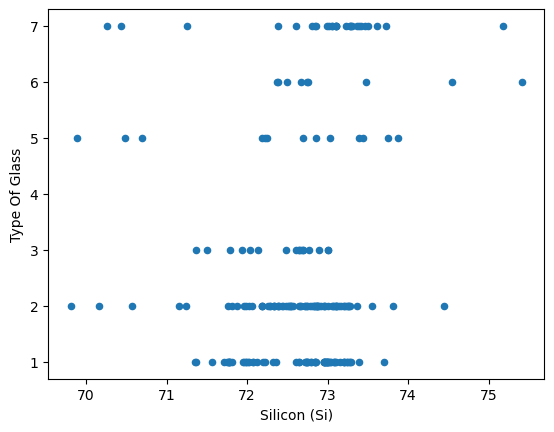

In [50]:
glass.plot.scatter(x='Silicon (Si)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a lower Silicon content than the other classes of glass (4 and above)

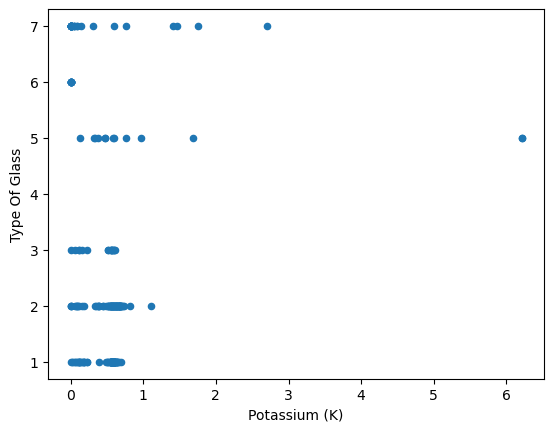

In [51]:
glass.plot.scatter(x='Potassium (K)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a lower Potassium content than the other classes of glass (4 and above)

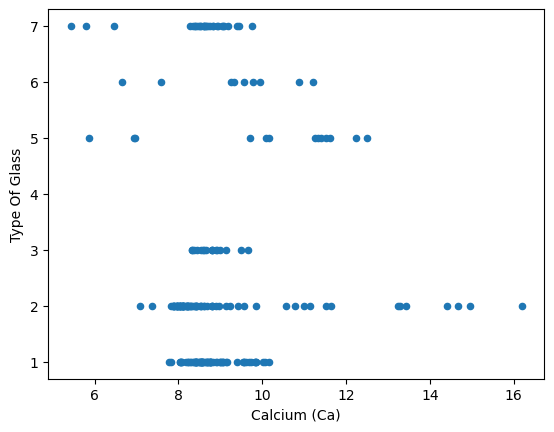

In [52]:
glass.plot.scatter(x='Calcium (Ca)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a higher Calcium content than the other classes of glass (4 and above)

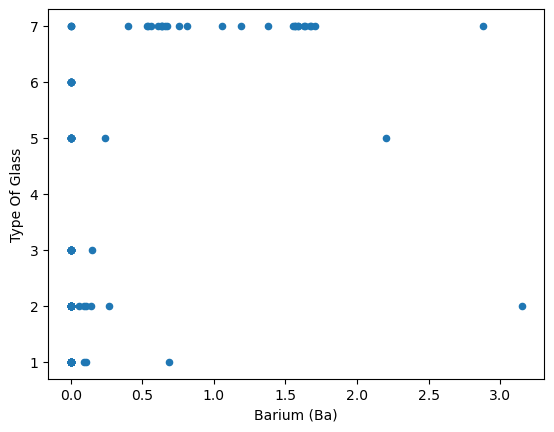

In [53]:
glass.plot.scatter(x='Barium (Ba)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a lower Barium content than the other classes of glass (4 and above)

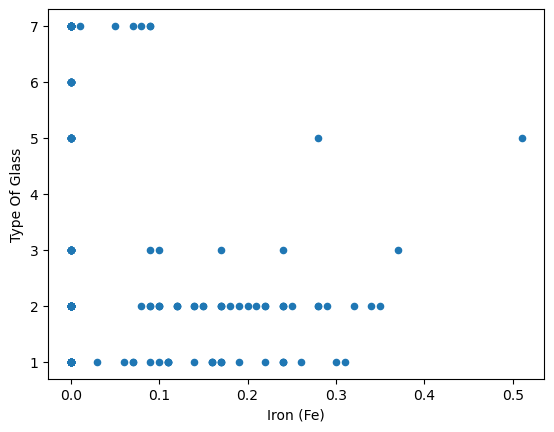

In [56]:
glass.plot.scatter(x='Iron (Fe)',y='Type Of Glass')
plt.show()

-- The classes of glass (1-4) have a higher Iron content than the other classes of glass (4 and above)

## Multivariate Analysis 

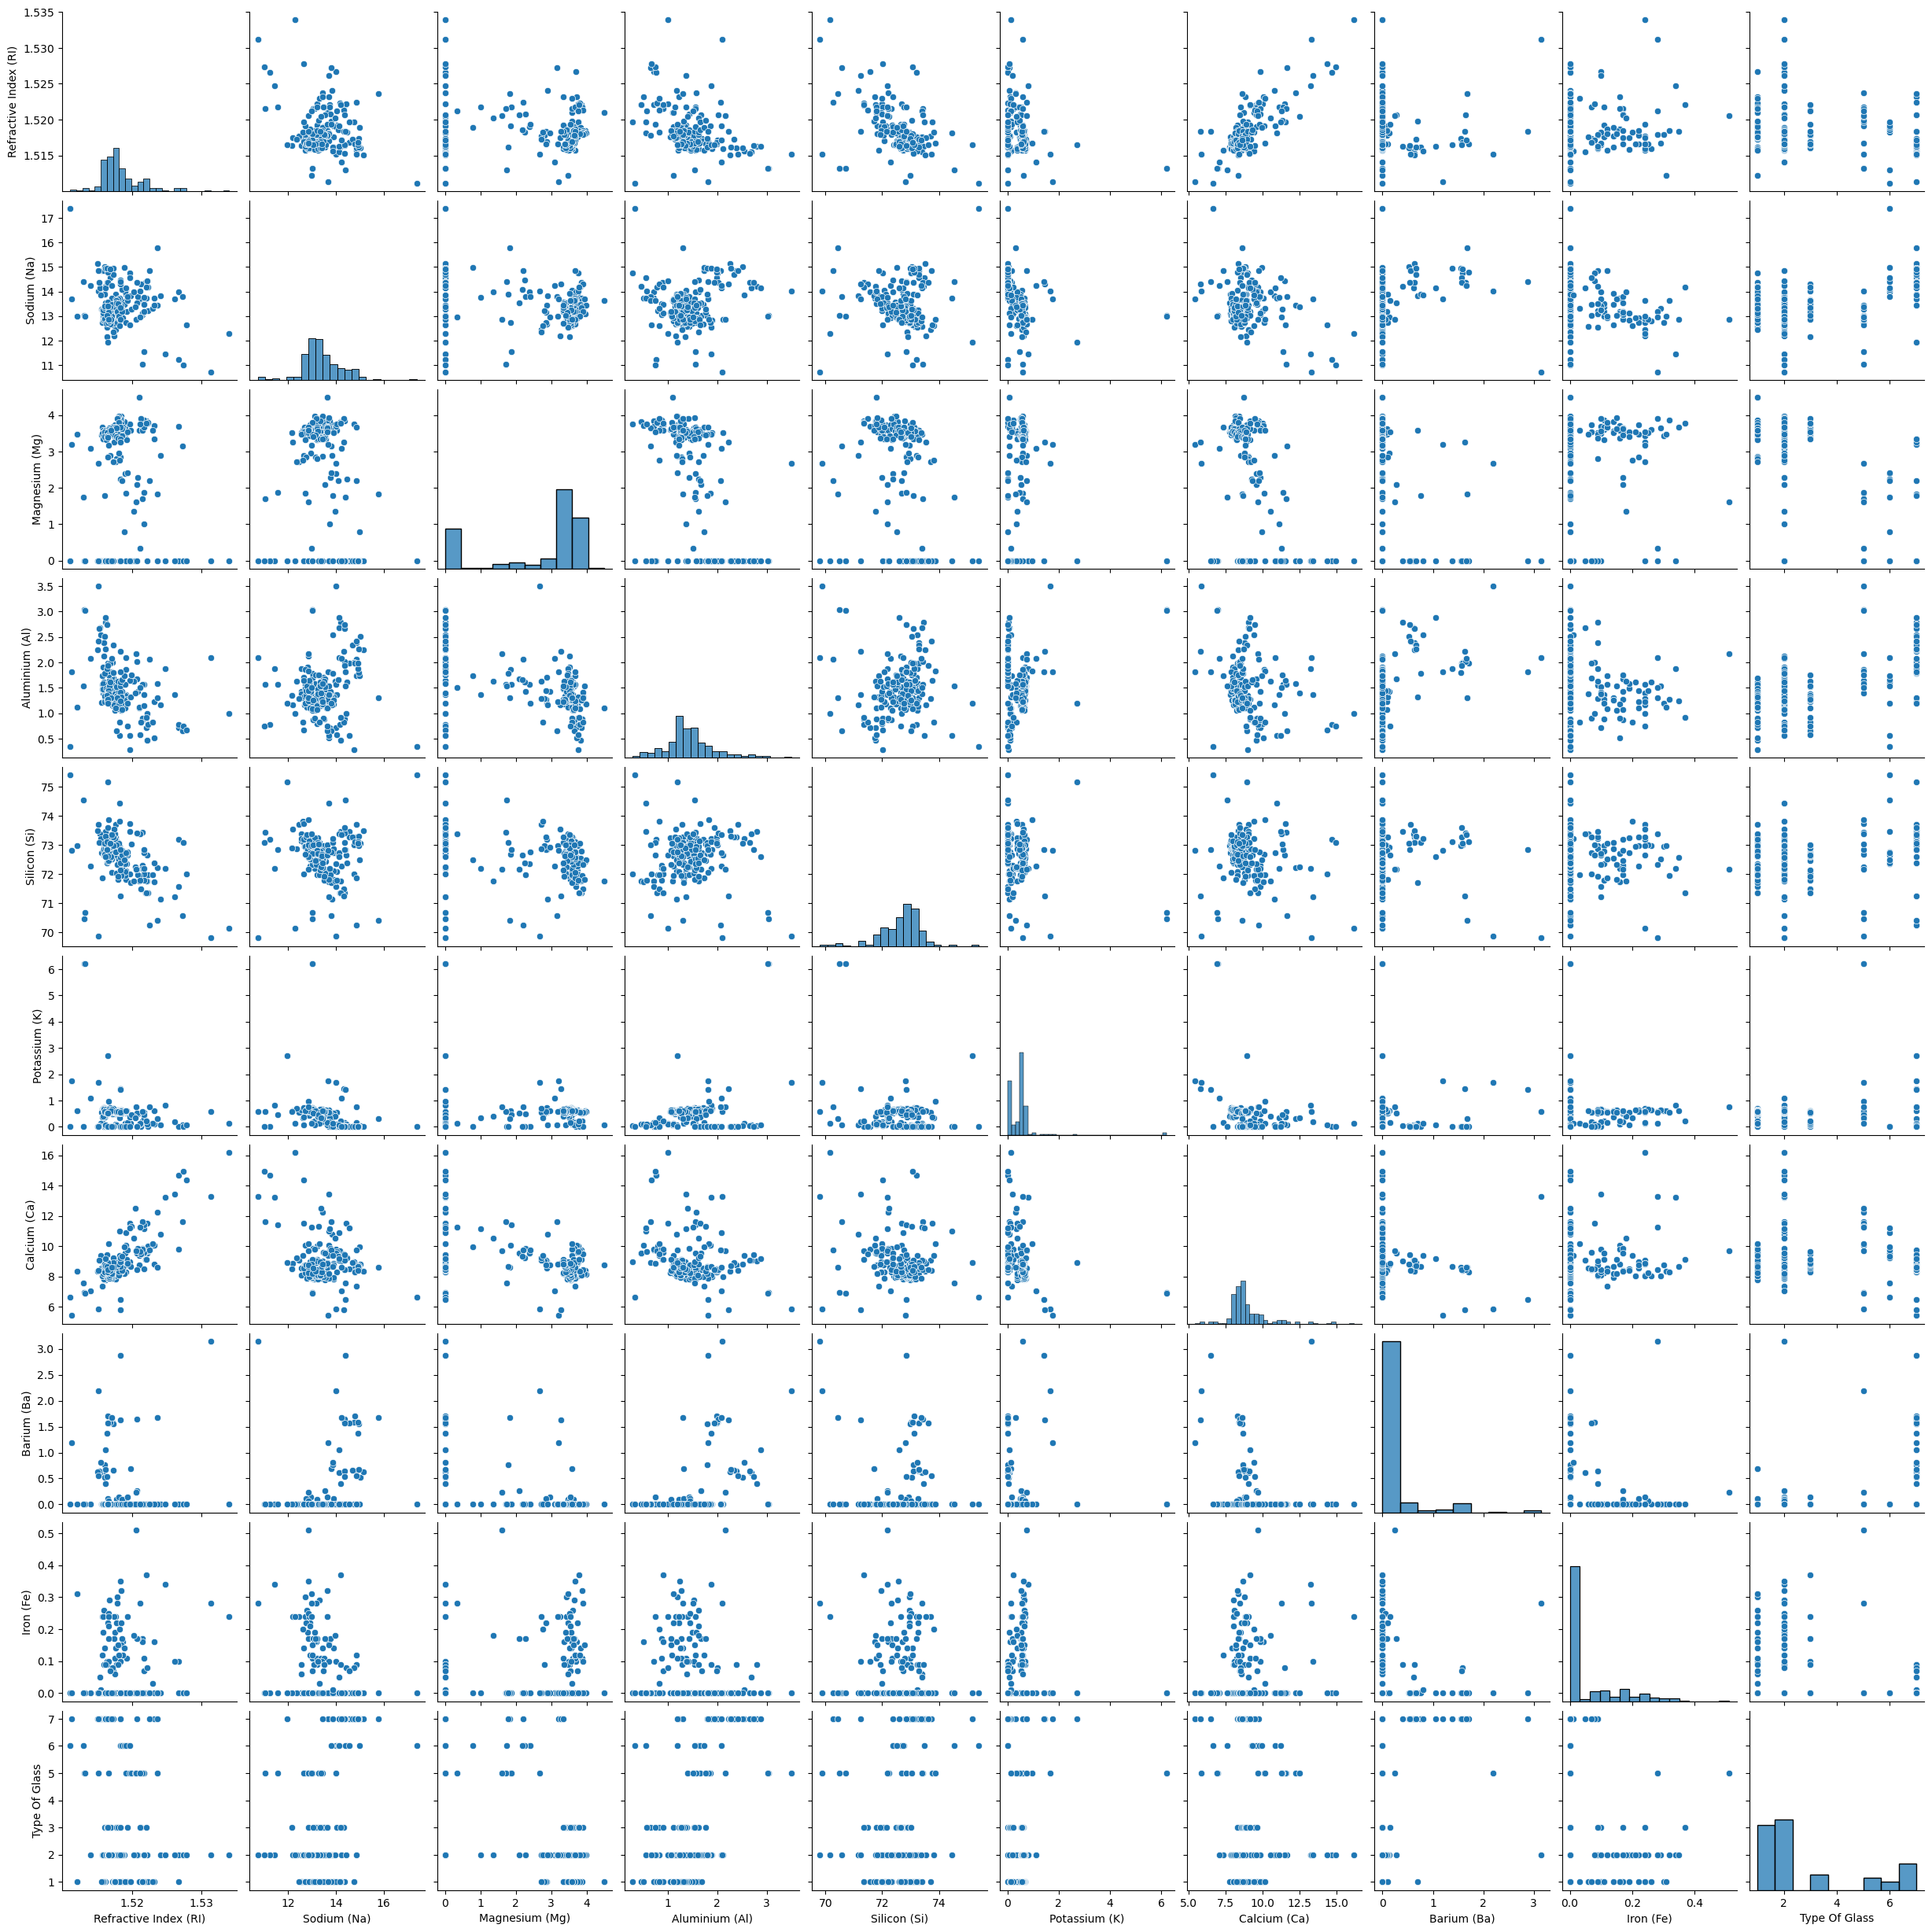

In [57]:
#Plotting the target variable against the independent variables using pairplot,so that the underlying linear relationship becomes more evident..
sns.pairplot(glass)

## Feature Engineering and Feature Selection 

In [62]:
# Now let's check for correlation of variables
glass_cor = glass.corr()
glass_cor

,Refractive Index (RI),Sodium (Na),Magnesium (Mg),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
Refractive Index (RI),1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Sodium (Na),-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Magnesium (Mg),-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Aluminium (Al),-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Silicon (Si),-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
Potassium (K),-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Calcium (Ca),0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Barium (Ba),-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Iron (Fe),0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type Of Glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


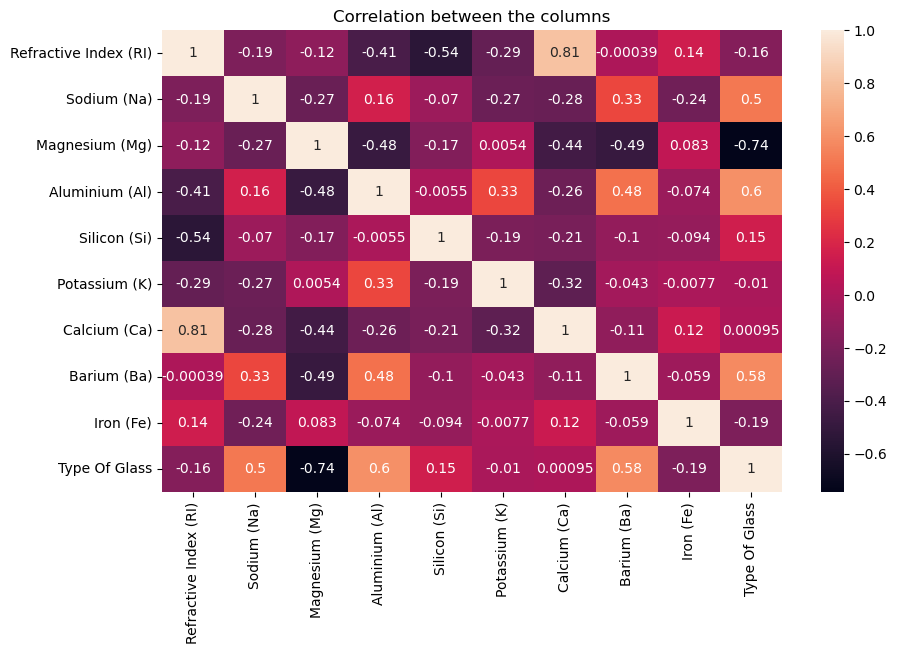

In [63]:
# Now let's visualise the above correlation values using heatmap and drop any columns which are least correlated to the target variable
plt.figure(figsize=(10,6))
sns.heatmap(glass_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- The features 'Sodium (Na)','Aluminium (Al)' and 'Barium (Ba)' are strongly positively correlated to the dependent variable..
   whereas the feature 'Magnesium (Mg)' is strongly negatively correlated to the dependent variable..and we might have to drop that particular column..

In [76]:
#Dropping the Magnesium column as it is very strongly negatively correlated to the dependent variable
glass.drop('Magnesium (Mg)', axis=1, inplace = True)

In [77]:
glass

,Refractive Index (RI),Sodium (Na),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,1.94,73.61,0.00,8.48,1.57,0.0,7


Refractive Index (RI)       Axes(0.125,0.53;0.110714x0.35)
Sodium (Na)              Axes(0.257857,0.53;0.110714x0.35)
Aluminium (Al)           Axes(0.390714,0.53;0.110714x0.35)
Silicon (Si)             Axes(0.523571,0.53;0.110714x0.35)
Potassium (K)            Axes(0.656429,0.53;0.110714x0.35)
Calcium (Ca)             Axes(0.789286,0.53;0.110714x0.35)
Barium (Ba)                 Axes(0.125,0.11;0.110714x0.35)
Iron (Fe)                Axes(0.257857,0.11;0.110714x0.35)
Type Of Glass            Axes(0.390714,0.11;0.110714x0.35)
dtype: object

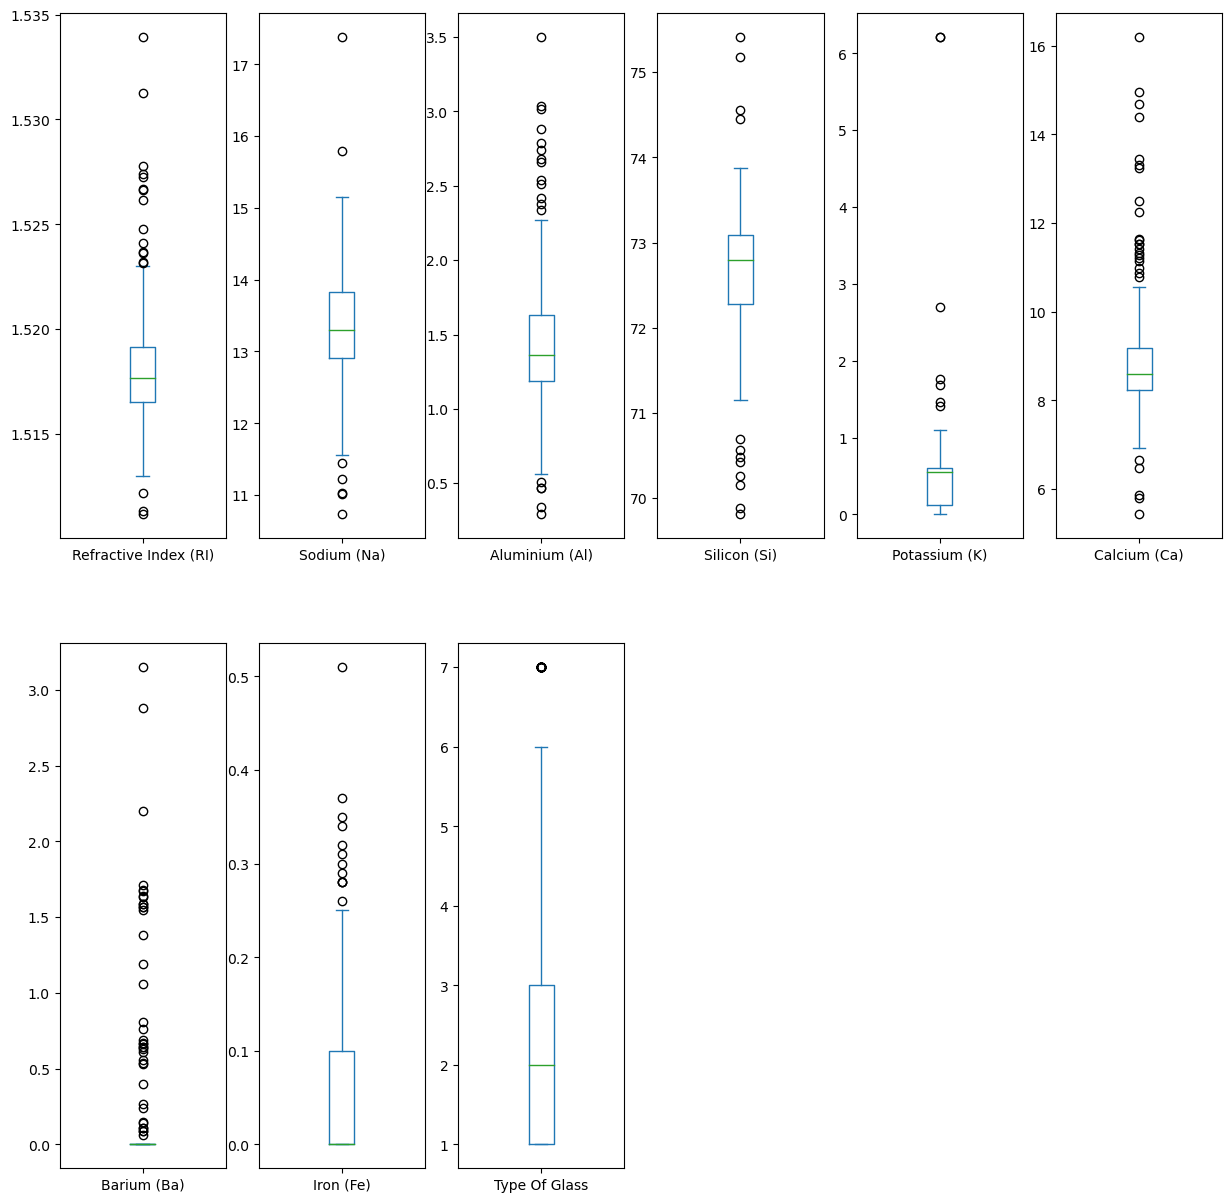

In [78]:
#Now let's detect outliers from the numerical columns and remove them only if needed..
#plt.figure(figsize = (25,30))
#sns.boxplot(glass)
glass.plot(kind='box',subplots=True,layout=(2,6),figsize=(15,15))

In [79]:
#Removing Outliers
from scipy.stats import zscore
z = np.abs(zscore(glass))
z

,Refractive Index (RI),Sodium (Na),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [80]:
#threshold = 3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
       4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))


In [118]:
glass_1 = glass[(z<3).all(axis=1)]
glass_1

,Refractive Index (RI),Sodium (Na),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,2.02,73.42,0.00,8.44,1.64,0.0,7


In [83]:
glass.shape

(214, 9)

In [95]:
glass_1.shape

(194, 9)

-- 20 rows are deleted as they have outliers...

In [85]:
#Checking for skewness..
glass.skew()

Refractive Index (RI)    1.625431
Sodium (Na)              0.454181
Aluminium (Al)           0.907290
Silicon (Si)            -0.730447
Potassium (K)            6.551648
Calcium (Ca)             2.047054
Barium (Ba)              3.416425
Iron (Fe)                1.754327
Type Of Glass            1.114915
dtype: float64

In [119]:
#Checking skewness for new dataset
glass_1.skew()

Refractive Index (RI)    0.952733
Sodium (Na)              0.371482
Aluminium (Al)           0.658259
Silicon (Si)            -0.425450
Potassium (K)            0.303175
Calcium (Ca)             1.077962
Barium (Ba)              3.188587
Iron (Fe)                1.486479
Type Of Glass            1.284007
dtype: float64

In [122]:
#Removing skewness
#glass_1['Barium (Ba)'] = np.cbrt(glass_1['Barium (Ba)'])
glass_1['Barium (Ba)'] = np.cbrt(glass_1['Barium (Ba)'])

In [123]:
glass_1.skew()

Refractive Index (RI)    0.952733
Sodium (Na)              0.371482
Aluminium (Al)           0.658259
Silicon (Si)            -0.425450
Potassium (K)            0.303175
Calcium (Ca)             1.077962
Barium (Ba)              1.877873
Iron (Fe)                1.486479
Type Of Glass            1.284007
dtype: float64

-- We can see that skewness has been reduced in the respective columns...

## Data Pre-Processing 

In [124]:
glass_1

,Refractive Index (RI),Sodium (Na),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe),Type Of Glass
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.000000,0.0,1
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.000000,0.0,1
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.000000,0.0,1
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.000000,0.0,1
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,2.74,72.85,0.00,9.45,0.977437,0.0,7
209,1.51623,14.14,2.88,72.61,0.08,9.18,1.002160,0.0,7
210,1.51685,14.92,1.99,73.06,0.00,8.40,1.017324,0.0,7
211,1.52065,14.36,2.02,73.42,0.00,8.44,1.018491,0.0,7


In [125]:
glass_1['Type Of Glass'].value_counts()

1    70
2    68
7    23
3    16
5     9
6     8
Name: Type Of Glass, dtype: int64

-- Now we have to categorise the quality variable into 0 and 1,so that it will be easier for us analyse the data. We categorise the data as, if Type of glass > 4 = then we classify them as non-window glass (1), if quality <= 4 = then we classify them as window glass (0)

In [129]:
def fun(glass):
    if glass > 4:
        return 1
    else:
        return 0

In [130]:
tog_1 = glass_1['Type Of Glass'].apply(fun)
tog_1.value_counts()

0    154
1     40
Name: Type Of Glass, dtype: int64

In [134]:
x = glass_1.drop('Type Of Glass',axis=1)
x

,Refractive Index (RI),Sodium (Na),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe)
0,1.52101,13.64,1.10,71.78,0.06,8.75,0.000000,0.0
1,1.51761,13.89,1.36,72.73,0.48,7.83,0.000000,0.0
2,1.51618,13.53,1.54,72.99,0.39,7.78,0.000000,0.0
3,1.51766,13.21,1.29,72.61,0.57,8.22,0.000000,0.0
4,1.51742,13.27,1.24,73.08,0.55,8.07,0.000000,0.0
...,...,...,...,...,...,...,...,...
208,1.51640,14.37,2.74,72.85,0.00,9.45,0.977437,0.0
209,1.51623,14.14,2.88,72.61,0.08,9.18,1.002160,0.0
210,1.51685,14.92,1.99,73.06,0.00,8.40,1.017324,0.0
211,1.52065,14.36,2.02,73.42,0.00,8.44,1.018491,0.0


In [133]:
y = tog_1
y

0      0
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    1
211    1
212    1
Name: Type Of Glass, Length: 194, dtype: int64

##### Feature scaling using StandardScaler() 

In [135]:
#Using standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x),columns = x.columns)
X

,Refractive Index (RI),Sodium (Na),Aluminium (Al),Silicon (Si),Potassium (K),Calcium (Ca),Barium (Ba),Iron (Fe)
0,1.291781,0.332127,-0.729105,-1.612464,-1.319609,-0.075653,-0.435755,-0.603056
1,-0.197832,0.704398,-0.141722,0.016082,0.172091,-1.008147,-0.435755,-0.603056
2,-0.824346,0.168328,0.264928,0.461790,-0.147559,-1.058826,-0.435755,-0.603056
3,-0.175926,-0.308179,-0.299864,-0.189629,0.491741,-0.612851,-0.435755,-0.603056
4,-0.281075,-0.218834,-0.412822,0.616073,0.420708,-0.764888,-0.435755,-0.603056
...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,2.975928,0.221793,-1.532708,0.633854,2.291256,-0.603056
190,-0.802440,1.076668,3.292211,-0.189629,-1.248575,0.360187,2.360235,-0.603056
191,-0.530805,2.238153,1.281553,0.581788,-1.532708,-0.430406,2.402539,-0.603056
192,1.134057,1.404267,1.349328,1.198921,-1.532708,-0.389863,2.405796,-0.603056


##### Checking VIF 

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns

vif

,VIF values,Features
0,5.109979,Refractive Index (RI)
1,3.088973,Sodium (Na)
2,2.227876,Aluminium (Al)
3,2.625780,Silicon (Si)
4,3.015246,Potassium (K)
5,3.042980,Calcium (Ca)
6,2.045993,Barium (Ba)
7,1.107495,Iron (Fe)


-- As we can see from the data, there is no presence of multicollinearity between the features..

##### Oversampling 

In [136]:
y.value_counts()

0    154
1     40
Name: Type Of Glass, dtype: int64

-- As we can see the data is not distributed equally, so there is a need for oversampling..We can use the SMOTE method to make the unbalanced data balanced..

In [138]:
#OverSampling
!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X1,y1 = sm.fit_resample(X,y)

In [139]:
y1.value_counts()

0    154
1    154
Name: Type Of Glass, dtype: int64

-- As we can see, the data is perfectly balanced, now we move onto model training 

## Model Training

In [141]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.30)

In [142]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (215, 8)
y_train  (215,)
X_test  (93, 8)
y_test  (93,)


#### Logistic Regression 

In [143]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [144]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 94.62%


In [145]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.92      0.95      0.94        38

    accuracy                           0.95        93
   macro avg       0.94      0.95      0.94        93
weighted avg       0.95      0.95      0.95        93



In [146]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[52  3]
 [ 2 36]]
TN:  52
FN:  2
TP:  36
FP:  3


--  As we can see from the above logistic regression model, the test accuracy is 94.62% ... Overall a very good model for our prediction of data

#### Decision Tree Classifier Model 

In [147]:
#importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [148]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 93.55%


In [149]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        55
           1       0.86      1.00      0.93        38

    accuracy                           0.94        93
   macro avg       0.93      0.95      0.93        93
weighted avg       0.94      0.94      0.94        93



In [150]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[49  6]
 [ 0 38]]
TN:  49
FN:  0
TP:  38
FP:  6


-- As we can see from the above Decision Tree Classifier model, the test accuracy is 93.55% ... Overall a very good model for our prediction of data, but not good than Logistic Regression.. 

#### Random Forest Classifier Model 

In [151]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [152]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 94.62%


In [153]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.90      0.97      0.94        38

    accuracy                           0.95        93
   macro avg       0.94      0.95      0.94        93
weighted avg       0.95      0.95      0.95        93



In [154]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[51  4]
 [ 1 37]]
TN:  51
FN:  1
TP:  37
FP:  4


-- As we can see from the above Random Forest Classifier model, the test accuracy is 94.62% ... Same as that of Logistic Regression but the TP value is high in Logistic regression model..

#### Support Vector Classifier Model

In [155]:
#importing necessary libraries
from sklearn.svm import SVC

In [156]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 95.70%


In [157]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.93      0.97      0.95        38

    accuracy                           0.96        93
   macro avg       0.95      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



In [158]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[52  3]
 [ 1 37]]
TN:  52
FN:  1
TP:  37
FP:  3


-- As we can see from the above Support Vector Classifier model, the test accuracy is 95.70% ... Best model for our prediction so far..

#### K- nearest neighbour classifier model 

In [159]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 95.70%


In [161]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.93      0.97      0.95        38

    accuracy                           0.96        93
   macro avg       0.95      0.96      0.96        93
weighted avg       0.96      0.96      0.96        93



In [162]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[52  3]
 [ 1 37]]
TN:  52
FN:  1
TP:  37
FP:  3


#### Naive Bayes Classifier Model 

In [163]:
from sklearn.naive_bayes import GaussianNB

In [164]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 94.62%


In [165]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.90      0.97      0.94        38

    accuracy                           0.95        93
   macro avg       0.94      0.95      0.94        93
weighted avg       0.95      0.95      0.95        93



In [166]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[51  4]
 [ 1 37]]
TN:  51
FN:  1
TP:  37
FP:  4


-- As we can see from the above Naive Bayes Classifier model, the test accuracy is 94.62% ... Same accuracy as Logistic regression and Random Forest Classifier models..

#### Cross- Validation score 

In [167]:
from sklearn.model_selection import cross_val_score

In [168]:
score = cross_val_score(logreg,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,logreg_pred) - score.mean())

[0.93548387 0.9516129  0.9516129  0.8852459  0.96721311]
0.9382337387625596
Difference between Accuracy score and cross validation score is -  0.00800282037722544


In [169]:
score = cross_val_score(dtree,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,dtree_pred) - score.mean())

[0.9516129  0.98387097 0.90322581 0.93442623 0.93442623]
0.9415124272871497
Difference between Accuracy score and cross validation score is -  -0.006028556319407796


In [170]:
score = cross_val_score(r_f,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,r_f_pred) - score.mean())

[0.98387097 1.         0.98387097 0.95081967 1.        ]
0.9837123215230037
Difference between Accuracy score and cross validation score is -  -0.0374757623832187


In [171]:
score = cross_val_score(svc,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,svc_pred) - score.mean())

[0.98387097 1.         0.98387097 0.93442623 0.98360656]
0.9771549444738235
Difference between Accuracy score and cross validation score is -  -0.020165697161995455


In [172]:
score = cross_val_score(knn,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,knn_pred) - score.mean())

[0.9516129  0.98387097 0.98387097 0.95081967 0.95081967]
0.9641988365943945
Difference between Accuracy score and cross validation score is -  -0.007209589282566542


In [173]:
score = cross_val_score(nb,X1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,nb_pred) - score.mean())

[0.93548387 0.96774194 0.93548387 0.90163934 0.96721311]
0.9415124272871497
Difference between Accuracy score and cross validation score is -  0.004724131852635316


-- We shall be choosing Support Vector Classifier as our best model...as it has high accuracy and the difference between accuracy and cross-val score is less too..
 Therefore, Support Vector Classifier is our best model..

## Hyper Parameter Tuning

In [175]:
param_grid = [{'C':[0.1,1,10,100],'kernel':['linear','rbf','poly','sigmoid'],'gamma':['scale','auto']}]

In [176]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(svc,param_grid)

In [177]:
best_grid = grid.fit(X_train,y_train)

In [190]:
best_grid.best_estimator_

SVC(C=1)

In [181]:
print(f'Accuracy - : {best_grid.score(X_train,y_train):.3f}')

Accuracy - : 0.991


In [196]:
Final_Model = SVC(C=1, gamma = 'auto', kernel = 'rbf')
Final_Model.fit(X_train,y_train)
pred = Final_Model.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

96.7741935483871


In [191]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       0.95      0.97      0.96        38

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



In [192]:
a = confusion_matrix(y_test, pred, labels=Final_Model.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[53  2]
 [ 1 37]]
TN:  53
FN:  1
TP:  37
FP:  2


-- Through hyper parameter Tuning, we have slightly increased the accuracy of the model(as we can see from 95.70% to 96.77%)
Now, we finalise this as our final model and save this particular model..

### Plotting the AUC-ROC curve for the final model

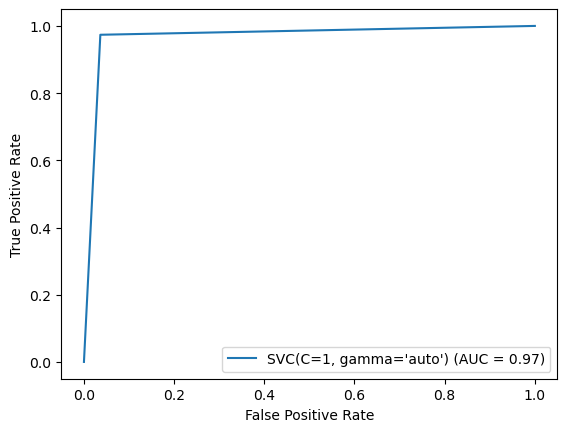

In [197]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_Model)
display.plot()

## Saving the Model

In [198]:
import joblib
joblib.dump(Final_Model,"Glass_Identification_project.pkl")

['Glass_Identification_project.pkl']

In [199]:
model = joblib.load("Glass_Identification_project.pkl")
prediction = model.predict(X_test)
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [201]:
a

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0], dtype=int64)

In [200]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

,Predicted,Original
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
88,0,0
89,0,0
90,1,1
91,0,0
